## importing the dependencies

In [71]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [72]:
df = pd.read_csv('data\StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [73]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [74]:
df_cleaned=df[df['Exam_Score']<=100]
df_cleaned

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [75]:
X=df_cleaned.drop(columns=['Exam_Score', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'],axis=1)
y=df_cleaned['Exam_Score']
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,19,64,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,24,98,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,29,89,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,19,92,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,23,76,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,20,90,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,10,86,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numerical_transformer=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')),
        ('scaler',StandardScaler())
    ]
)
categorical_transformer= Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ]
)
preprocessor= ColumnTransformer([
    ('num',numerical_transformer,num_features),
    ('cat',categorical_transformer,cat_features)
])

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
X_train_transformed= preprocessor.fit_transform(X_train)
X_test_transformed= preprocessor.transform(X_test)

In [79]:
X_train_transformed

array([[-1.50976073, -0.43310433,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-2.01250687, -0.60651671,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.67734278, -0.34639813,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.33364177, -0.25969194,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16605973, -1.64699103,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.16605973, -1.56028484,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [80]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2_square= r2_score(true,predicted)

    return mae,rmse,r2_square

In [81]:
models= {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]

    # fitting the model
    model.fit(X_train_transformed,y_train)

    # make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    model_train_mae,model_train_rmse,model_train_r2= evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2= evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance on Training set')
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print('-------------------------------------------')

    print('Model performance on Test set')
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)

    print('\n')

Linear Regression
Model performance on Training set
- Mean Absolute Error: 1.0134
- Root Mean Squared Error: 2.3031
- R2 Score: 0.6554
-------------------------------------------
Model performance on Test set
- Mean Absolute Error: 0.9353
- Root Mean Squared Error: 1.8039
- R2 Score: 0.7539


Lasso
Model performance on Training set
- Mean Absolute Error: 1.9668
- Root Mean Squared Error: 3.0491
- R2 Score: 0.3960
-------------------------------------------
Model performance on Test set
- Mean Absolute Error: 1.8816
- Root Mean Squared Error: 2.6674
- R2 Score: 0.4620


Ridge
Model performance on Training set
- Mean Absolute Error: 1.0130
- Root Mean Squared Error: 2.3029
- R2 Score: 0.6555
-------------------------------------------
Model performance on Test set
- Mean Absolute Error: 0.9354
- Root Mean Squared Error: 1.8043
- R2 Score: 0.7538


K-Neighbors
Model performance on Training set
- Mean Absolute Error: 1.3414
- Root Mean Squared Error: 2.3220
- R2 Score: 0.6497
-------------

In [82]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model Name,R2 Score
0,Linear Regression,0.753921
2,Ridge,0.753822
7,CatBoosting Regressor,0.713733
5,Random Forest Regressor,0.663636
6,XGBRegressor,0.621235
3,K-Neighbors,0.560676
1,Lasso,0.461960
8,AdaBoost Regressor,0.415592
4,Decision Tree,-0.096015


In [83]:
lin_model= LinearRegression()
lin_model.fit(X_train_transformed,y_train)
y_pred=lin_model.predict(X_test_transformed)
score= r2_score(y_test,y_pred)*100
print(f'Accuracy of the model {score:.2f}')

Accuracy of the model 75.39


<Axes: xlabel='Exam_Score'>

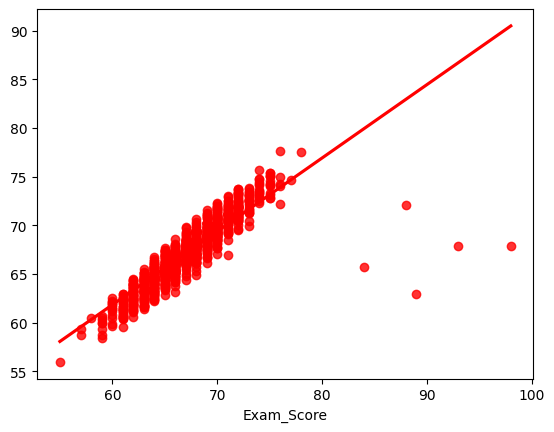

In [84]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [85]:
ridge_model= Ridge()
ridge_model.fit(X_train_transformed,y_train)
y_pred_1=ridge_model.predict(X_test_transformed)
score= r2_score(y_test,y_pred_1)*100
print(f'Accuracy of the model {score:.2f}')

Accuracy of the model 75.38


<Axes: xlabel='Exam_Score'>

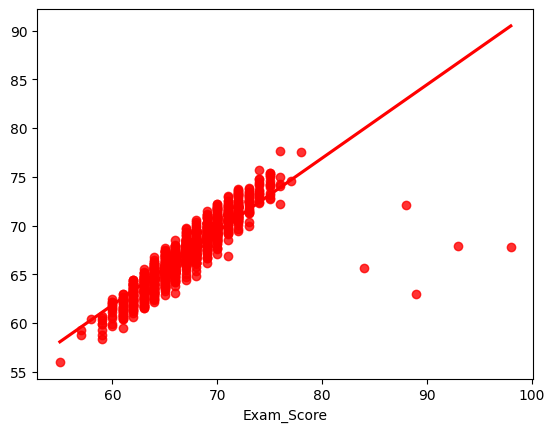

In [86]:
sns.regplot(x=y_test,y=y_pred_1,ci=None,color='red')

In [88]:
pred_df= pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,difference
6415,66,65.875000,0.125000
6117,66,65.050781,0.949219
239,67,68.253906,-1.253906
1906,67,67.156250,-0.156250
6097,68,69.417969,-1.417969
...,...,...,...
5810,69,68.777344,0.222656
1268,69,67.878906,1.121094
414,66,66.472656,-0.472656
3700,69,68.714844,0.285156
